In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import re
import glob
from datetime import datetime, date
from dateutil.relativedelta import * 
import cPickle

from wordcloud import WordCloud

In [11]:
counts = {}
for year in range(2007,2016):
    fn = "/Users/rcordell/Development/MIDS-251/data/{0}/postings.pkl".format(year)
    infile = open(fn, "rb")
    counts.update(cPickle.load(infile))

In [3]:
len(counts)

2908

In [4]:
days = sorted(counts.keys())
days_plot = []
posts = []
for i, day in enumerate(days):
    posts.append(counts[day])
    days_plot.append(day)

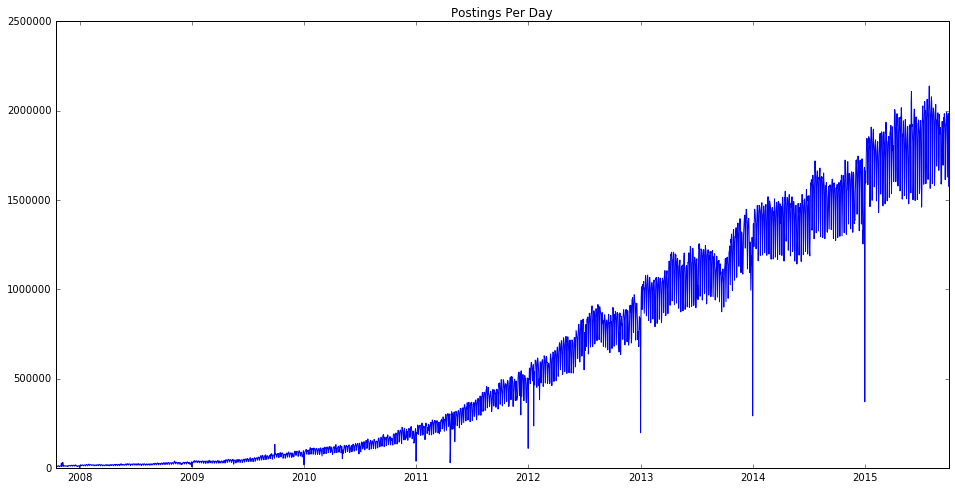

In [6]:
fig = plt.figure(figsize=(16,8))
p = plt.subplot(1,1,1)
plt.plot(days_plot, posts)
plt.title("Postings Per Day")

In [2]:
auth_posts = {}
for year in range(2007,2014):
    print year
    fn = "/Users/rcordell/Development/MIDS-251/data/{0}/authorperday_?.pkl".format(year)
    part_files = glob.glob(fn)
    if len(part_files) == 0:
        fn = "/Users/rcordell/Development/MIDS-251/data/{0}/authorperday.pkl".format(year)
        part_files = glob.glob(fn)
    for f in part_files:
        with open(f, "rb") as infile:
            auth_posts.update(cPickle.load(infile))

2007
2008
2009
2010
2011
2012
2013


In [3]:
len(auth_posts)

2274

In [4]:
key = auth_posts.keys()[100]
print '{:%Y-%m-%d}'.format(key)
print len(auth_posts[key].keys())

2009-12-26
447


In [ ]:
i = 0
for day in auth_posts:
    print '{:%Y-%m-%d}'.format(day)
    print "--", len(auth_posts[day].keys())
    k = 0
    j = 0
    z = 0
    for sr in auth_posts[day]:
        x = 0
        for a in auth_posts[day][sr]:
            if a != '[deleted]':
                x += auth_posts[day][sr][a]
        z += x
        j += 1
    print "**", z, " -- ", j
    i += 1
    if i > 5:
        break



In [46]:
#days = sorted(auth_posts.keys())
stop_words = ['delet', 'reddit', 'bot','pics']
authors = []
counts = {}
for day in auth_posts:
    subreddits = []
    for sr in auth_posts[day]:
        x = 0
        # skip subreddits that contain stop words
        if not any(s in sr.lower() for s in stop_words):
            for a in auth_posts[day][sr]:
                # skip authors that have stop words
                if not any(s in a.lower() for s in stop_words):
                    x += auth_posts[day][sr][a]
            for i in range(0,x):
                subreddits.append(sr)
    newday = date(day.year,day.month,day.day)
    counts[newday] = subreddits

In [47]:
key = counts.keys()[10]
print key

2010-09-01


In [48]:
day_seq = sorted(counts.keys())
month_seq = []
for i in range(1, len(day_seq)/30):
    month_seq.append(day_seq[0] + relativedelta(months=+i))
month_seq

[datetime.date(2007, 11, 15),
 datetime.date(2007, 12, 15),
 datetime.date(2008, 1, 15),
 datetime.date(2008, 2, 15),
 datetime.date(2008, 3, 15),
 datetime.date(2008, 4, 15),
 datetime.date(2008, 5, 15),
 datetime.date(2008, 6, 15),
 datetime.date(2008, 7, 15),
 datetime.date(2008, 8, 15),
 datetime.date(2008, 9, 15),
 datetime.date(2008, 10, 15),
 datetime.date(2008, 11, 15),
 datetime.date(2008, 12, 15),
 datetime.date(2009, 1, 15),
 datetime.date(2009, 2, 15),
 datetime.date(2009, 3, 15),
 datetime.date(2009, 4, 15),
 datetime.date(2009, 5, 15),
 datetime.date(2009, 6, 15),
 datetime.date(2009, 7, 15),
 datetime.date(2009, 8, 15),
 datetime.date(2009, 9, 15),
 datetime.date(2009, 10, 15),
 datetime.date(2009, 11, 15),
 datetime.date(2009, 12, 15),
 datetime.date(2010, 1, 15),
 datetime.date(2010, 2, 15),
 datetime.date(2010, 3, 15),
 datetime.date(2010, 4, 15),
 datetime.date(2010, 5, 15),
 datetime.date(2010, 6, 15),
 datetime.date(2010, 7, 15),
 datetime.date(2010, 8, 15),
 datet

In [49]:
def wc(text, f):
    wordcloud = WordCloud(width=680, height=400, relative_scaling=0.5, background_color="white").generate(text)
#        fig = plt.figure(figsize=(20,30))
#        plt.imshow(wordcloud)
#        plt.axis("off")
#        plt.show()

    wordcloud.to_file(f)



In [50]:
i = 0
for month in month_seq:
    print month
    fn = "subred{0}.png".format(i)
    print fn
    text = ""
    for item in counts[month]:
        text += item + ' '
    wc(text, fn)
    print len(text)
    i += 1


2007-11-15
subred0.png
35811
2007-12-15
subred1.png
34037
2008-01-15
subred2.png
52060
2008-02-15
subred3.png
47327
2008-03-15
subred4.png
24928
2008-04-15
subred5.png
68270
2008-05-15
subred6.png
82927
2008-06-15
subred7.png
62119
2008-07-15
subred8.png
91906
2008-08-15
subred9.png
81644
2008-09-15
subred10.png
105588
2008-10-15
subred11.png
130884
2008-11-15
subred12.png
81797
2008-12-15
subred13.png
114269
2009-01-15
subred14.png
157006
2009-02-15
subred15.png
98644
2009-03-15
subred16.png
122029
2009-04-15
subred17.png
150927
2009-05-15
subred18.png
158450
2009-06-15
subred19.png
179490
2009-07-15
subred20.png
215772
2009-08-15
subred21.png
157846
2009-09-15
subred22.png
302017
2009-10-15
subred23.png
316315
2009-11-15
subred24.png
263365
2009-12-15
subred25.png
374840
2010-01-15
subred26.png
359189
2010-02-15
subred27.png
392470
2010-03-15
subred28.png
421895
2010-04-15
subred29.png
455763
2010-05-15
subred30.png
348788
2010-06-15
subred31.png
523427
2010-07-15
subred32.png
574283